
#**Ejercicios Unidad 1**
1. Elija una de las imágenes color que tomó para la clase y aplique separación de canales y elija un método para transformarla en escala de grises. Muestre por pantalla los resultados obtenidos.

In [9]:
# Instalar la biblioteca pytube
!pip install pytube
!apt update && apt install -y handbrake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 835.2 kB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [802 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,641 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,081 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,358 kB]
Get:12 http://a

In [10]:
!pip install -q mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import mediapy as media
import numpy as np
from pathlib import Path

In [2]:
image1 = cv2.imread("20240404_171030.jpg")
image2 = cv2.imread("20240404_171038.jpg")

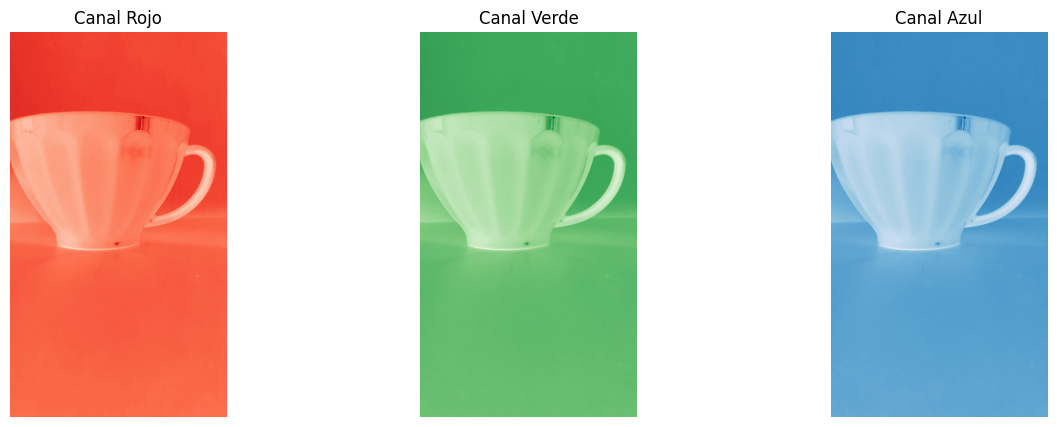

In [3]:
R, G, B = image1[:,:,0], image1[:,:,1], image1[:,:,2]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')
axs[0].axis('off')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')

plt.show()

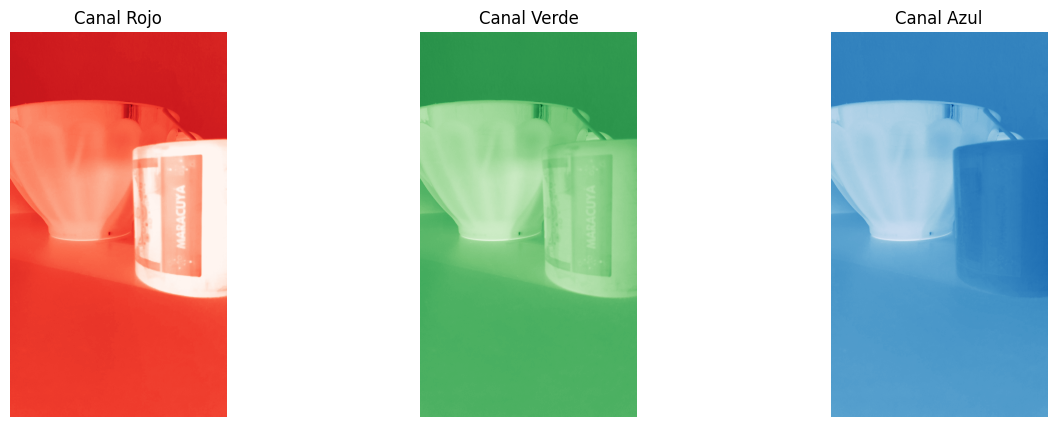

In [4]:
R, G, B = image2[:,:,0], image2[:,:,1], image2[:,:,2]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')
axs[0].axis('off')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')

plt.show()

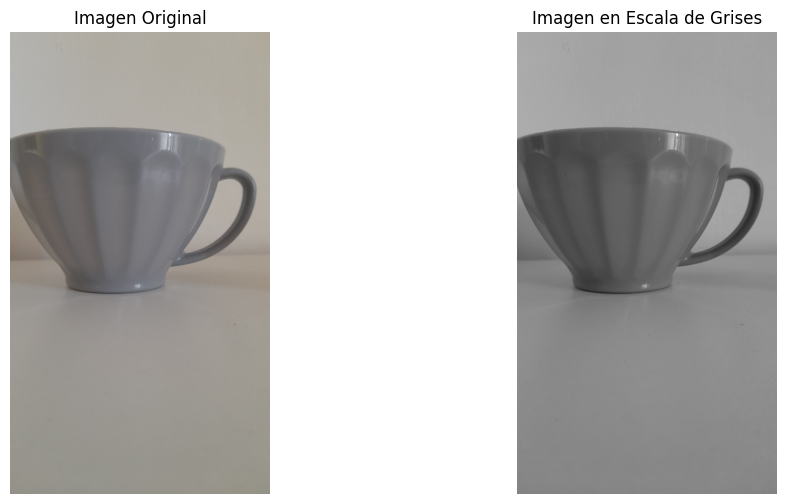

In [5]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image1_rgb)
plt.title("Imagen Original")
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(image1_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis('off')

plt.show()

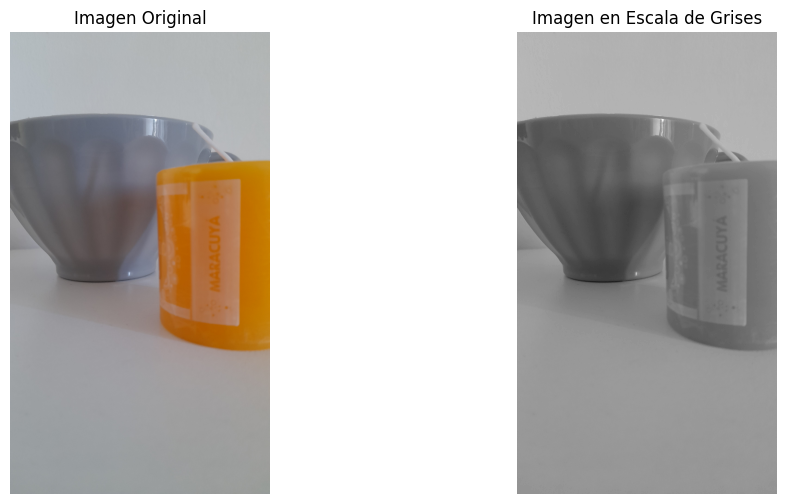

In [6]:
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image2_rgb)
plt.title("Imagen Original")
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(image2_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis('off')

plt.show()


2. Con las fotografías pedidas por la cátedra la clase pasada (la foto de objetos con fondo liso, y fotos del mismo producto en un contexto más complejo) usar los métodos de extracción de características (esos anteriores al Deep Learning) para encontrar la ubicación del producto dentro de la imagen.

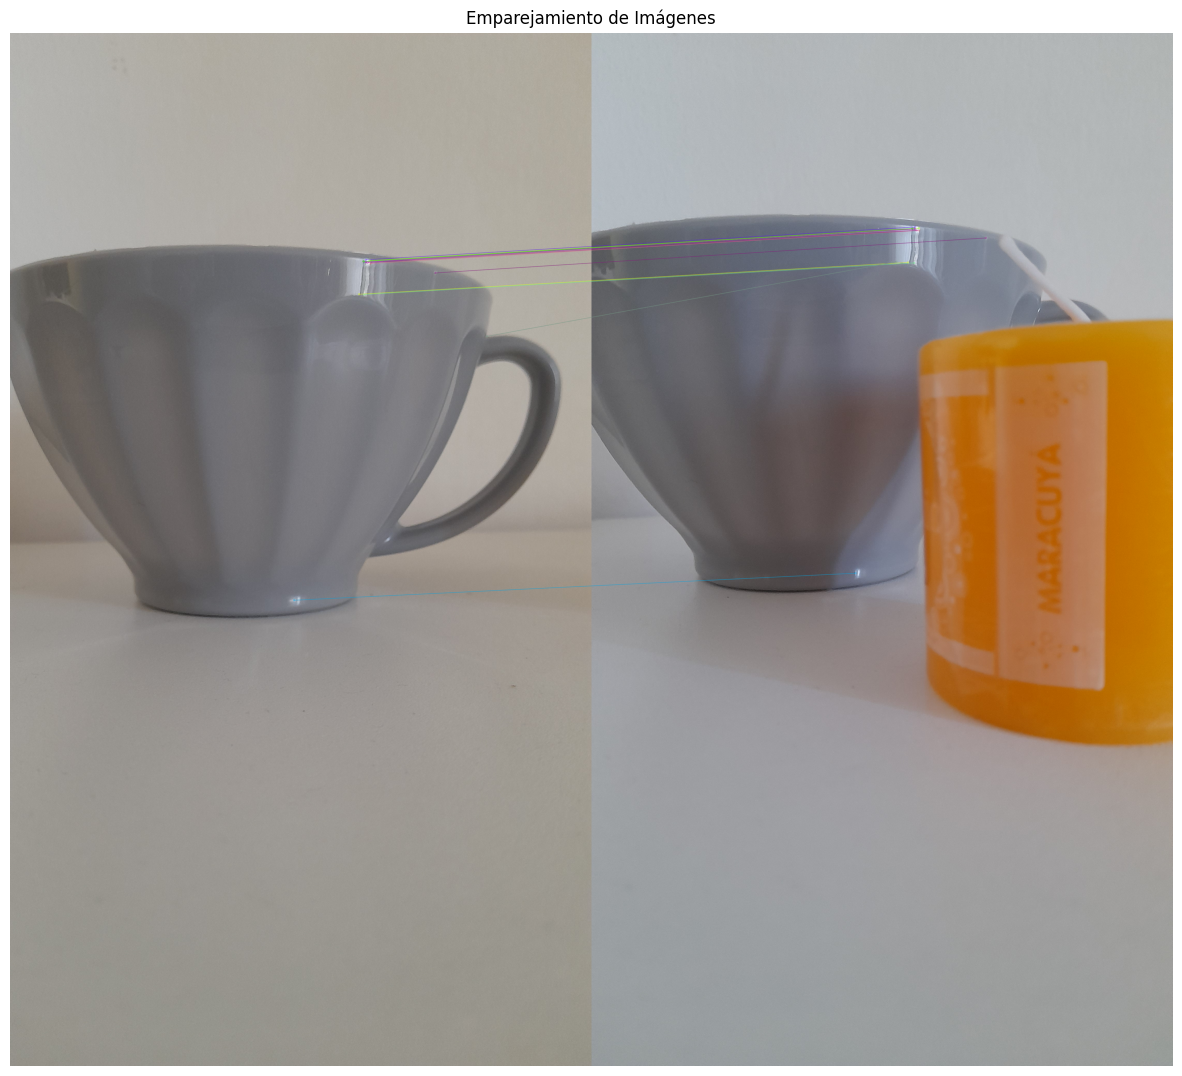

In [7]:
orb = cv2.ORB_create()

# Detectar keypoints y calcular descriptores
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Crear un objeto BFMatcher para encontrar las coincidencias
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontrar coincidencias
matches = bf.match(descriptors1, descriptors2)

# Ordenar las coincidencias en orden de distancia (cuanto más baja, mejor)
matches = sorted(matches, key=lambda x:x.distance)

# Dibujar las primeras 15 coincidencias
matched_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:15], outImg=None, flags=2)

# Ajustar el tamaño de la figura de matplotlib
plt.figure(figsize=(15, 20))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Emparejamiento de Imágenes')
plt.axis('off')
plt.show()


3. Para leer un paper, conviene arrancar leyendo el abstract, luego hacer una lectura por los títulos de las distintas secciones, prestar atención a las imágenes y su texto asociado, y leer con detalle la conclusión.
    
    Se dividirá la comisión completa en 5 grupos de dialogo, cada grupo tomará un paper diferente de los que se muestran en la sección “Técnicas de extracción de características mediante aprendizaje profundo.” Les proponemos hacer una primera lectura del mismo. Luego de la misma un par de valientes del grupo dará una breve presentación de los mismos.
    
    [01_superpoint.pdf](https://drive.google.com/file/d/1tx6GrL1Cr-LnQBSH1K9xffPxbasQugE9/view?usp=drive_web)
    
    [02_d2net.pdf](https://drive.google.com/file/d/1-b07QhWcRdQWYhZxQ6wY97KN_Oiu1M8L/view?usp=drive_web)
    
    [03_NeurIPS.pdf](https://drive.google.com/file/d/1su2irZiTg1brgTUaAGxgUquHzZDzp_7d/view?usp=drive_web)
    
    [04_liu2018.pdf](https://drive.google.com/file/d/1IQT7nKAHXQD7opxk7ws-mLok7NGdXe09/view?usp=drive_web)
    
    [05_Zhang_Deep_Graphical_Feature_Learning.pdf](https://drive.google.com/file/d/15mFrmQvKmCFX_WeFNYfticSOrOKcKVTL/view?usp=drive_web)
    


4. Con los videos de [youtube.com](http://youtube.com) de cámara fija pedidos para esta clase, aplicar los algoritmos de detección de movimiento vistos en la teoría.

In [15]:
# Función para oscurecer una imagen:
def process_image(new_image, prev_image, **kwargs):
    # Convertir la imagen a float32
    new_image_float = new_image.astype(np.float32)

    # Reducir el brillo de la imagen a la mitad
    new_image_float *= 0.5

    # Convertir la imagen de vuelta a uint8
    new_image_uint8 = np.clip(new_image_float, 0, 255).astype(np.uint8)

    return new_image_uint8

def draw_contours(frame, contours, color=(0, 255, 0), thickness=2):
    # Comprobar si la imagen es en escala de grises (1 canal)
    if len(frame.shape) == 2 or frame.shape[2] == 1:
        # Convertir la imagen de escala de grises a color (3 canales)
        result_image = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    else:
        # Si ya es una imagen de color, simplemente hacer una copia
        result_image = frame.copy()

    # Dibujar cada contorno en la imagen
    for contour in contours:
        # Obtener el rectángulo delimitador para cada contorno
        x, y, w, h = cv2.boundingRect(contour)
        # Dibujar el rectángulo
        cv2.rectangle(result_image, (x, y), (x + w, y + h), color, thickness)

    return result_image

# Función para procesar un video:
def video_processor(filename_in, filename_out, process_func, max_time=10, **kwargs):
    # Abrir el video de entrada para lectura
    with media.VideoReader(filename_in) as r:
        # Crear un archivo de video de salida
        with media.VideoWriter(filename_out, shape=r.shape, fps=r.fps, bps=r.bps) as w:
            count = 0  # Inicializar contador de fotogramas
            prev_image = None  # Inicializar la imagen previa

            # Iterar sobre cada imagen (fotograma) del video
            for image in r:
                new_image = media.to_uint8(image)  # Convertir la imagen a formato flotante

                # Comprobar si es la primera imagen
                if prev_image is None:
                    prev_image = new_image.copy()

                # Procesar la imagen utilizando la función dada
                processed_image = process_func(new_image, prev_image, **kwargs)

                # Añadir la imagen procesada al video de salida
                w.add_image(processed_image)

                # Actualizar la imagen previa
                prev_image = new_image.copy()

                # Incrementar el contador de fotogramas
                count += 1

                # Detener el proceso si se alcanza el tiempo máximo
                if count >= max_time * r.fps:
                    break


In [16]:
filename_in = 'lv_0_20240321184020.mp4'
filename_out = 'highway_dark.mp4'

# Llamar a la función para procesar el video
video_processor(filename_in, filename_out, process_image, 10)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)


In [17]:
# Función actualizada para realizar diferencia de fotogramas con normalización:
def process_frame_difference(new_image, prev_image, **kwargs):
    # Convertir las imágenes a escala de grises
    new_gray = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
    prev_gray = cv2.cvtColor(prev_image, cv2.COLOR_RGB2GRAY)

    # Calcular la diferencia absoluta entre los fotogramas actual y anterior
    frame_diff = cv2.absdiff(new_gray, prev_gray)

    # Normalizar la imagen de diferencia
    norm_diff = cv2.normalize(frame_diff, None, 0, 255, cv2.NORM_MINMAX)

    # Umbralizar la imagen para resaltar las diferencias
    _, thresh = cv2.threshold(norm_diff, 30, 255, cv2.THRESH_BINARY)

    # Convertir la imagen umbralizada a color para mantener la consistencia con el video original
    thresh_color = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

    return thresh_color

# Nombres de los archivos de video de entrada y salida
filename_in = 'lv_0_20240321184020.mp4'
filename_out = 'highway_frame_difference.mp4'

# Llamar a la función para procesar el video
video_processor(filename_in, filename_out, process_frame_difference, 10)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)

In [19]:

# Función actualizada para detectar movimientos y dibujar cuadros delimitadores:
def process_frame_difference_full(new_image, prev_image, **kwargs):
    # Convertir las imágenes a escala de grises
    new_gray = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
    prev_gray = cv2.cvtColor(prev_image, cv2.COLOR_RGB2GRAY)

    # Calcular la diferencia absoluta entre los fotogramas actual y anterior
    frame_diff = cv2.absdiff(new_gray, prev_gray)

    # Normalizar la imagen de diferencia
    norm_diff = cv2.normalize(frame_diff, None, 0, 255, cv2.NORM_MINMAX)

    # Umbralizar la imagen para resaltar las diferencias
    _, thresh = cv2.threshold(norm_diff, 30, 255, cv2.THRESH_BINARY)

    # Dilatar la imagen umbralizada para mejorar la detección de contornos
    kernel = np.ones((5,5),np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations = 1)

    # Convertir la imagen dilatada a formato adecuado para findContours
    dilated = dilated.astype(np.uint8)

    # Encontrar contornos en la imagen dilatada
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar cuadros delimitadores alrededor de los contornos
    if kwargs.get('draw_mode', 0) == 0:
      result_image = draw_contours(new_image, contours)
    elif kwargs.get('draw_mode', 0) == 1:
      result_image = draw_contours(thresh, contours)

    return result_image


# Nombres de los archivos de video de entrada y salida
filename_in = 'lv_0_20240321184020.mp4'
filename_out = 'highway_frame_difference_full.mp4'

# Llamar a la función para procesar el video
video_processor(filename_in, filename_out, process_frame_difference_full,
                max_time=10, draw_mode=1)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)

# Llamar a la función para procesar el video
filename_out = 'highway_frame_difference_full_2.mp4'
video_processor(filename_in, filename_out, process_frame_difference_full,
                max_time=10, draw_mode=0)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)


5. (Entrega obligatoria individual en repo) Genere un video en un patio o en un hall de edificio donde en un principio se vea vacío y luego aparezca una persona. Mediante los métodos de motion detection (sin usar deep learning) logre una detección de la persona cuando entra al cuadro suponiendo la utilidad para una cámara de seguridad.
Luego sobre el mismo video aplique los algoritmos de flujo denso y disperso que se mostraron en clase.
Escriba una reflexión sobre los resultados en el formato md dentro del Jupyter Notebook.


6. (Entrega obligatoria individual en repo) Explique cuál es diferencia entre localización de objetos y clasificación de imágenes. Muestre ejemplos de ello.